# Decision Tree Classifier

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

iris = load_iris()
print(f'Classes: {iris.target_names}')

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

decision_tree = tree.DecisionTreeClassifier(random_state = 0)

decision_tree.fit(X_train, y_train)

Classes: ['setosa' 'versicolor' 'virginica']


DecisionTreeClassifier(random_state=0)

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import metrics

def compute_metrics(model):
    y_pred = model.predict(X_test)
    score = 0
    for output in zip(y_pred, y_test):
        score = (score + 1) if output[0] == output[1] else score
    score = score / len(y_test)
    print(f'Score: {score}')

    print(f'Training score: {model.score(X_train, y_train)}')
    print(f'Test score: {model.score(X_test, y_test)}')
    print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
    print(f'Precision per class: {metrics.precision_score(y_test, y_pred, average = None)}')
    print(f'Recall per class: {metrics.recall_score(y_test, y_pred, average = None)}')
    print(f'F1-score per class: {metrics.f1_score(y_test, y_pred, average = None)}')

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
    disp.plot()
    plt.show()

Score: 0.9736842105263158
Training score: 1.0
Test score: 0.9736842105263158
Accuracy: 0.9736842105263158
Precision per class: [1.  1.  0.9]
Recall per class: [1.     0.9375 1.    ]
F1-score per class: [1.         0.96774194 0.94736842]


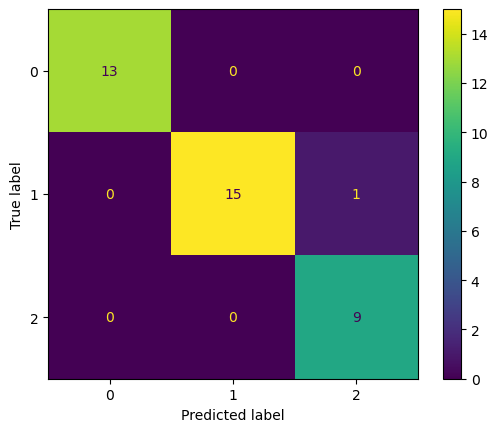

In [6]:
compute_metrics(decision_tree)

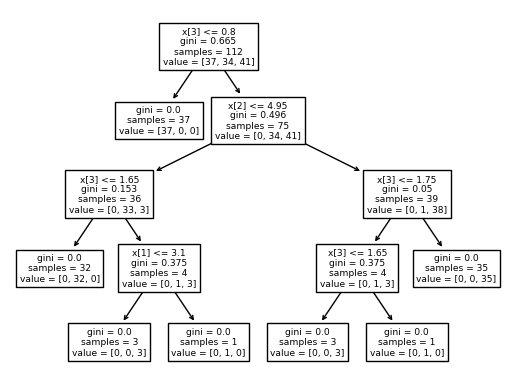

In [7]:
decision_path = decision_tree.decision_path(iris.data)
tree.plot_tree(decision_tree)
plt.show()